# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

**IMPORTANTE** Podemos llegar a tener problemas con los Long Paths de Windows 10
Urls clave:
- https://learn.microsoft.com/en-us/windows/win32/fileio/maximum-file-path-limitation?tabs=registry#enable-long-paths-in-windows-10-version-1607-and-later
- https://support.microsoft.com/en-us/windows/how-to-open-registry-editor-in-windows-10-deab38e6-91d6-e0aa-4b7c-8878d9e07b11


In [1]:
!pip install tensorflow keras

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\puent\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.

You should consider upgrading via the 'C:\Users\puent\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Empezamos importando librerías

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [5]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Vemos dimensiones del dataset

In [6]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

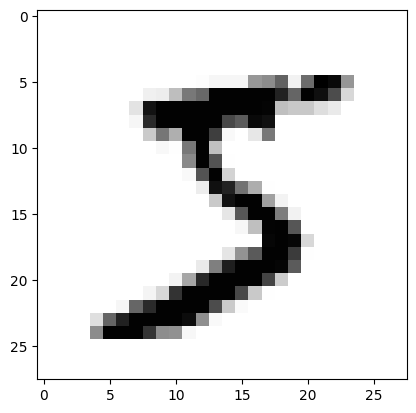

In [8]:
import matplotlib.pyplot as plt

#Deprecated! plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));
plt.imshow(X_train[0], cmap= plt.colormaps["Greys"]);

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [10]:
np.mean(X_train)

0.13066062

In [11]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [13]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

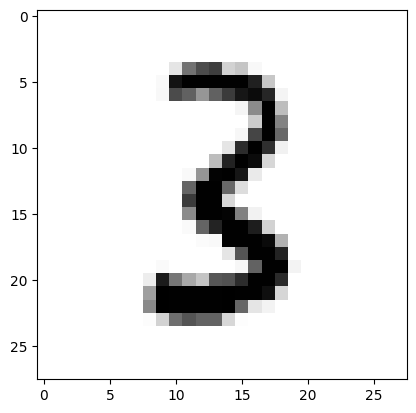

In [14]:
import matplotlib.pyplot as plt

#Deprecated! plt.imshow(X_val[0], cmap=plt.cm.get_cmap('Greys'));
plt.imshow(X_val[0], cmap= plt.colormaps["Greys"]);

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [16]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [19]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [20]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [21]:
len(weights[0])

300

In [22]:
28*28

784

In [23]:
300*784

235200

In [24]:
weights.size

235200

In [25]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [26]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [27]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [28]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [29]:
X_train.shape

(50000, 28, 28)

In [30]:
50000/128

390.625

In [31]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 3s 5ms/step - loss: 1.2349 - accuracy: 0.6976 - val_loss: 0.5987 - val_accuracy: 0.8644
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5166 - accuracy: 0.8683 - val_loss: 0.3980 - val_accuracy: 0.8948
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3983 - accuracy: 0.8919 - val_loss: 0.3332 - val_accuracy: 0.9092
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3477 - accuracy: 0.9037 - val_loss: 0.3008 - val_accuracy: 0.9154
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3169 - accuracy: 0.9113 - val_loss: 0.2790 - val_accuracy: 0.9228
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2949 - accuracy: 0.9167 - val_loss: 0.2645 - val_accuracy: 0.9243
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2775 - accuracy: 0.9220 - val_loss: 0.2510 - val_accuracy: 0.9270
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [32]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0822 - accuracy: 0.9771 - val_loss: 0.1016 - val_accuracy: 0.9716
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.1002 - val_accuracy: 0.9718
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0763 - accuracy: 0.9790 - val_loss: 0.0987 - val_accuracy: 0.9720
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0735 - accuracy: 0.9798 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0707 - accuracy: 0.9809 - val_loss: 0.0963 - val_accuracy: 0.9734
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0682 - accuracy: 0.9816 - val_loss: 0.0961 - val_accuracy: 0.9734
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0661 - accuracy: 0.9820 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [33]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.2349045276641846,
  0.5166288018226624,
  0.39831241965293884,
  0.34766432642936707,
  0.3168850243091583,
  0.2949369549751282,
  0.2774997651576996,
  0.26332226395606995,
  0.25096654891967773,
  0.23993171751499176,
  0.23039095103740692,
  0.22145302593708038,
  0.21335162222385406,
  0.20578140020370483,
  0.19865195453166962,
  0.1918094903230667,
  0.18568818271160126,
  0.17962613701820374,
  0.17420925199985504,
  0.16880552470684052,
  0.1638924479484558,
  0.15903142094612122,
  0.1545662134885788,
  0.1500970721244812,
  0.1459636688232422,
  0.14202621579170227,
  0.1383148729801178,
  0.13471679389476776,
  0.13144834339618683,
  0.12821082770824432,
  0.12504102289676666,
  0.12188320606946945,
  0.11899787932634354,
  0.11638534814119339,
  0.11369375884532928,
  0.11102578788995743,
  0.10865317285060883,
  0.10623771697282791,
  0.10390707850456238,
  0.1017642542719841,
  0.09936057776212692,
  0.0973944365978241,
  0.09546812623739243,
  0.093314796686

In [34]:
history.history

{'loss': [1.2349045276641846,
  0.5166288018226624,
  0.39831241965293884,
  0.34766432642936707,
  0.3168850243091583,
  0.2949369549751282,
  0.2774997651576996,
  0.26332226395606995,
  0.25096654891967773,
  0.23993171751499176,
  0.23039095103740692,
  0.22145302593708038,
  0.21335162222385406,
  0.20578140020370483,
  0.19865195453166962,
  0.1918094903230667,
  0.18568818271160126,
  0.17962613701820374,
  0.17420925199985504,
  0.16880552470684052,
  0.1638924479484558,
  0.15903142094612122,
  0.1545662134885788,
  0.1500970721244812,
  0.1459636688232422,
  0.14202621579170227,
  0.1383148729801178,
  0.13471679389476776,
  0.13144834339618683,
  0.12821082770824432,
  0.12504102289676666,
  0.12188320606946945,
  0.11899787932634354,
  0.11638534814119339,
  0.11369375884532928,
  0.11102578788995743,
  0.10865317285060883,
  0.10623771697282791,
  0.10390707850456238,
  0.1017642542719841,
  0.09936057776212692,
  0.0973944365978241,
  0.09546812623739243,
  0.093314796686

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.234905,0.69756,0.598728,0.8644
1,0.516629,0.86828,0.398020,0.8948
2,0.398312,0.89192,0.333228,0.9092
3,0.347664,0.90366,0.300840,0.9154
4,0.316885,0.91132,0.278974,0.9228
5,0.294937,0.91670,0.264544,0.9243
6,0.277500,0.92200,0.251047,0.9270
7,0.263322,0.92558,0.240093,0.9309
8,0.250967,0.92926,0.229339,0.9349
9,0.239932,0.93198,0.220772,0.9375


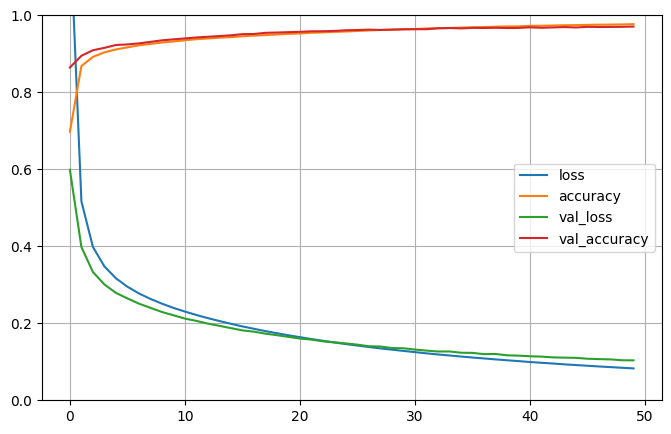

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [38]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9736


[0.08659282326698303, 0.9735999703407288]

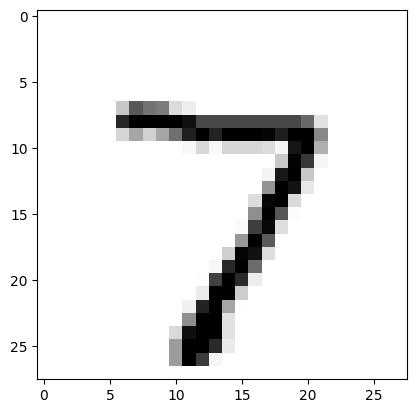

In [39]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.colormaps.get_cmap('Greys'));

In [40]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [41]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 103ms/step
(1, 10)


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [42]:
predictions.argmax()

7

In [43]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

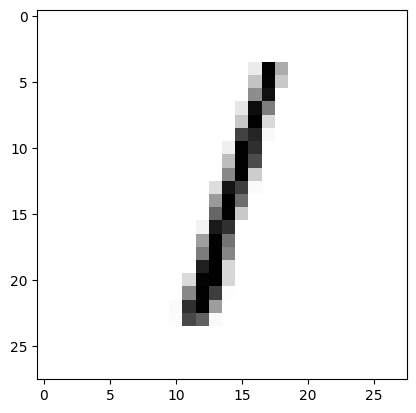

In [44]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.colormaps.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [45]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Divimos en train, test y validation

In [47]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [49]:
11610/32

362.8125

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7589 - val_loss: 0.4875
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4372 - val_loss: 1.2958
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5670 - val_loss: 0.6554
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 0.3986
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3907 - val_loss: 0.4161
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3841 - val_loss: 0.4118
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3796 - val_loss: 0.3940
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3740 - val_loss: 0.3840
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - val_loss: 0.3913
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3653 - val_loss: 0.3752

In [51]:
8*30 + 30

270

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3743
0.3742896616458893


In [54]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 70ms/step


array([[3.2535295],
       [1.7293779],
       [2.1569462],
       [2.4171605],
       [2.1237001]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [55]:
model.save("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


In [56]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [57]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
316/363 [=========================>....] - ETA: 0s - loss: 0.3364INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3397
Epoch 2/30
313/363 [========================>.....] - ETA: 0s - loss: 0.3451INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3401
Epoch 3/30
321/363 [=========================>....] - ETA: 0s - loss: 0.3324INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3354
Epoch 4/30
327/363 [==========================>...] - ETA: 0s - loss: 0.3429INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3384
Epoch 5/30
314/363 [========================>.....] - ETA: 0s - loss: 0.3290INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3330
Epoch 6/30
357/363 [============================>.] - ETA: 0s - loss: 0.3303INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3318
Epoch 7/30
335/363 [==========================>...] - ETA: 0s - loss: 0.3384INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3366
Epoch 8/30
361/363 [============================>.] - ETA: 0s - loss: 0.3355INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3351
Epoch 9/30
356/363 [============================>.] - ETA: 0s - loss: 0.3324INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 3ms/step - loss: 0.3314
Epoch 10/30
307/363 [========================>.....] - ETA: 0s - loss: 0.3286INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3300
Epoch 11/30
351/363 [============================>.] - ETA: 0s - loss: 0.3289INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3293
Epoch 12/30
338/363 [==========================>...] - ETA: 0s - loss: 0.3304INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3286
Epoch 13/30
338/363 [==========================>...] - ETA: 0s - loss: 0.3320INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3259
Epoch 14/30
325/363 [=========================>....] - ETA: 0s - loss: 0.3240INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3241
Epoch 15/30
315/363 [=========================>....] - ETA: 0s - loss: 0.3188INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3224
Epoch 16/30
347/363 [===========================>..] - ETA: 0s - loss: 0.3228INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3232
Epoch 17/30
344/363 [===========================>..] - ETA: 0s - loss: 0.3260INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3249
Epoch 18/30
342/363 [===========================>..] - ETA: 0s - loss: 0.3227INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3206
Epoch 19/30
329/363 [==========================>...] - ETA: 0s - loss: 0.3166INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3199
Epoch 20/30
357/363 [============================>.] - ETA: 0s - loss: 0.3199INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3194
Epoch 21/30
322/363 [=========================>....] - ETA: 0s - loss: 0.3190INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 3ms/step - loss: 0.3197
Epoch 22/30
363/363 [==============================] - ETA: 0s - loss: 0.3171INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3171
Epoch 23/30
360/363 [============================>.] - ETA: 0s - loss: 0.3159INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 3ms/step - loss: 0.3167
Epoch 24/30
320/363 [=========================>....] - ETA: 0s - loss: 0.3172INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3152
Epoch 25/30
325/363 [=========================>....] - ETA: 0s - loss: 0.3154INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3149
Epoch 26/30
329/363 [==========================>...] - ETA: 0s - loss: 0.3180INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3159
Epoch 27/30
339/363 [===========================>..] - ETA: 0s - loss: 0.3126INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3136
Epoch 28/30
347/363 [===========================>..] - ETA: 0s - loss: 0.3128INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3134
Epoch 29/30
349/363 [===========================>..] - ETA: 0s - loss: 0.3181INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 3ms/step - loss: 0.3160
Epoch 30/30
363/363 [==============================] - ETA: 0s - loss: 0.3119INFO:tensorflow:Assets written to: callback_model\assets


INFO:tensorflow:Assets written to: callback_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3119


### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [58]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3122 - val_loss: 0.3314
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3120 - val_loss: 0.3523
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3120 - val_loss: 0.3326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3107 - val_loss: 0.3995
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3122 - val_loss: 0.3718
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3088 - val_loss: 0.3247
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3083 - val_loss: 0.3391
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3094 - val_loss: 0.3277
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3112 - val_loss: 0.3372
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3070 - val_loss: 0.3357